## 03 — Spectral Embedding

We turn geometry into coordinates. Compute the first $m$ non-trivial Laplace–Beltrami eigenvectors, then map each vertex $v_i$ to the vector of eigenvector values $(\phi_1(i),\dots,\phi_m(i))\in\mathbb{R}^m$. The resulting set of points in $\mathbb{R}^m$ captures the mesh’s intrinsic geometry. This is the **spectral embedding**.

### The spectral embedding map

We solve the **generalized eigenproblem**
$$
L\,\phi = \lambda\, M\,\phi,
\qquad 0=\lambda_0 < \lambda_1 \le \lambda_2 \le \cdots,
$$
to obtain eigenvector-eigenvalue pairs. Note that

- $\phi_0$ is constant: the **trivial** eigenvector is skipped.
- $\phi_1,\phi_2,\phi_3,\dots$ are the smooth non-constant scalar functions on the surface.

What does it mean to be *smooth* on a mesh? Intuitively, a vertex function $\phi$ is smooth if it does not change much across edges. In other words if $\phi(i)-\phi(j)$ is small across adjacent vertices $i,j$.

A standard way to quantify smoothness is via the **Dirichlet energy**. For a vertex function $f\in\mathbb{R}^{|V|}$ and the cotangent Laplacian $L$, one has
$$
f^\top L f = \frac{1}{2} \sum_{(i,j)\in E} L_{ij}(f_i-f_j)^2,
$$  
Thus large changes across edges increase the energy, while slowly varying functions have small energy.

Therefore, to get a smooth (nontrivial) function we want to minimize $f^\top L f$, but we dont want the the trivial solution $f\equiv 0$ and also constant functions (which have zero energy). This is done by minimizing the **Rayleigh quotient**
$$
R(f)=\frac{f^\top L f}{f^\top M f},
$$
where $M$ is the mass matrix (which discrete area-weighted $L^2$ inner product as seen before).

Now the Courant–Fischer min–max principle for the generalized eigenproblem $L\phi=\lambda M\phi$ tells us that the Laplacian eigenvectors satisfy
$$
\phi_1 = \arg\min_{f\perp_M \phi_0}\frac{f^\top L f}{f^\top M f},\qquad
\phi_2 = \arg\min_{f\perp_M \{\phi_0,\phi_1\}}\frac{f^\top L f}{f^\top M f},\ \dots
$$
where $f\perp_M g$ means $f^\top M g=0$.

A proof can be found in: https://people.inf.ethz.ch/arbenz/ewp/Lnotes/lsevp2010.pdf

Since $\phi_0$ is constant, $\phi_1$ is the **smoothest non-constant** vertex function. More generally, $\phi_k$ is the smoothest function that is $M$-orthogonal to the previously chosen eigenfunctions $\phi_0,\dots,\phi_{k-1}$.


Given an  positive integer $m \in \mathbb{N}$, we use the first $m$ *non-trivial* eigenvectors ordered by the size of their corresponding eigenvalue as coordinates:
$$
\Phi_m(v_i) = \big(\phi_1(i),\,\phi_2(i),\,\dots,\,\phi_m(i)\big)\in\mathbb{R}^m.
$$

- For $m=2$, we get a 2D “parameterization-like” view.
- For $m=3$, we get a 3D intrinsic embedding.

We list some nice properties of the spectral embedding:

**1) Preserves geodesic proximity locally.**  
Low-frequency eigenvectors are **smooth**, so nearby vertices tend to have similar values:
if $i$ and $j$ are close on the surface, then typically $\phi_k(i)\approx \phi_k(j)$ for small $k$,
so $\Phi_m(i)$ and $\Phi_m(j)$ stay close in $\mathbb{R}^m$ for small $m$.

*(global distances can distort and points can overlap if $m$ is small.)*

**2) Isometry-invariant.**  
The Laplace–Beltrami operator is intrinsic (depends only on distances on the surface, not how its positioned in $\mathbb{R}^3$), so isometric shapes have the same spectral embedding up to sign or rotation.

**3) Captures global structure.**  
The first few eigenvectors describe the “biggest” ways the surface can vary. They change slowly (approximately smooth) and reflect the main intrinsic directions of the shape. As a result, long parts or separate lobes often spread apart when we plot vertices in these low-dimensional spectral coordinates.

Example: on a sphere, the first nontrivial eigenspace is (up to rotation) the span of $x,y,z$. If we only keep two modes, this is essentially like mapping $(x,y,z)\mapsto(x,y)$. Thus the image is a disk, and points from the north and south hemispheres can land on top of each other. This is illustrated in the cells below.

In [40]:
import os, sys

def _find_repo_root():
    for candidate in [os.getcwd(), os.path.abspath('..')]:
        if os.path.isdir(os.path.join(candidate, 'src')):
            return candidate
    raise FileNotFoundError("Can't find repo root. Run from the repo directory.")

ROOT = _find_repo_root()
sys.path.insert(0, ROOT)

import numpy as np
import matplotlib.pyplot as plt
from src.laplacian import (
    load_mesh, cotangent_weights, mass_matrix, spectral_decomposition
)
from src.viz import plot_spectral_embedding

%matplotlib inline

## Sphere

In [41]:
V, F = load_mesh(f'{ROOT}/meshes/sphere.obj')
L = cotangent_weights(V, F)
M = mass_matrix(V, F)
eigenvalues, eigenvectors = spectral_decomposition(L, M, k=10)

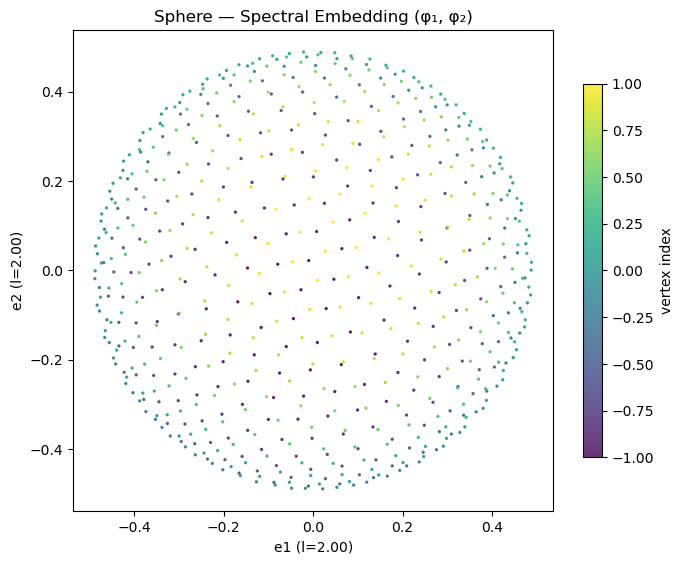

In [44]:
# 2D embedding using the first two eigenvectors (Fiedler vector + next)
plot_spectral_embedding(
    eigenvectors, eigenvalues,
    dims=(0, 1),
    title='Sphere — Spectral Embedding (φ₁, φ₂)',
    color=V[:, 2],  # color by z-coordinate to see correspondence
)

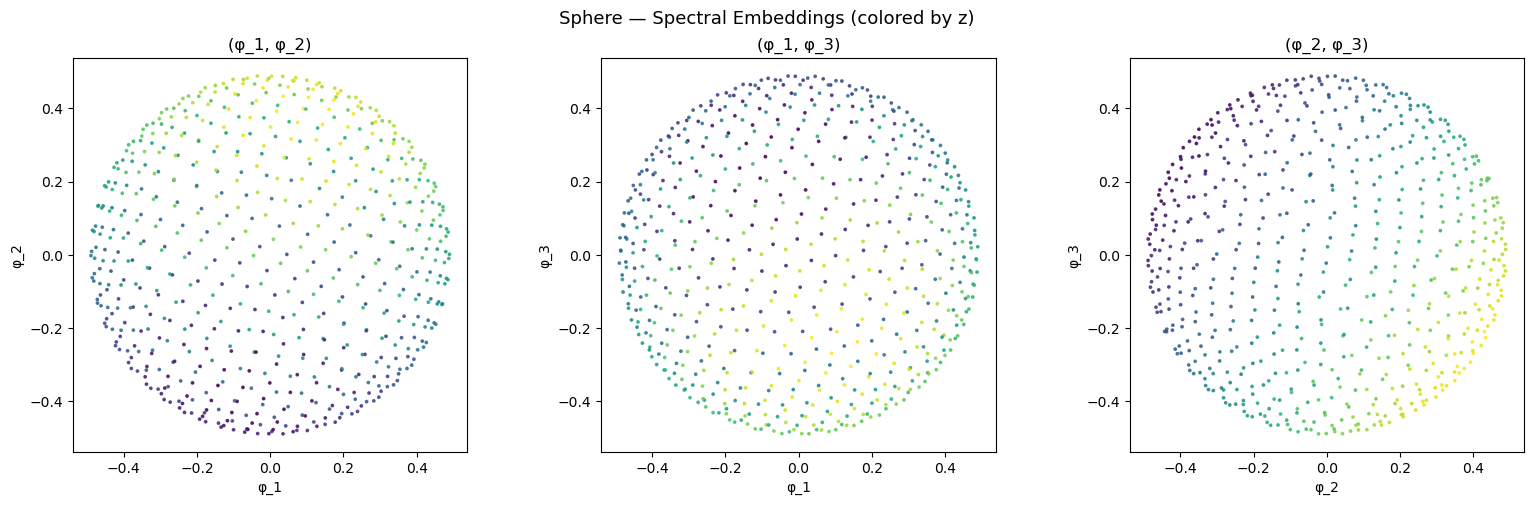

In [23]:
# Try different eigenvector pairs
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

pairs = [(0, 1), (0, 2), (1, 2)]
for ax, (d0, d1) in zip(axes, pairs):
    sc = ax.scatter(
        eigenvectors[:, d0], eigenvectors[:, d1],
        c=V[:, 2], cmap='viridis', s=3, alpha=0.8
    )
    ax.set_xlabel(f'φ_{d0+1}')
    ax.set_ylabel(f'φ_{d1+1}')
    ax.set_title(f'(φ_{d0+1}, φ_{d1+1})')
    ax.set_aspect('equal')

plt.suptitle('Sphere — Spectral Embeddings (colored by z)', fontsize=13)
plt.tight_layout()
plt.show()

### 3D spectral embedding

Using the first three eigenvectors as $(x, y, z)$ coordinates.

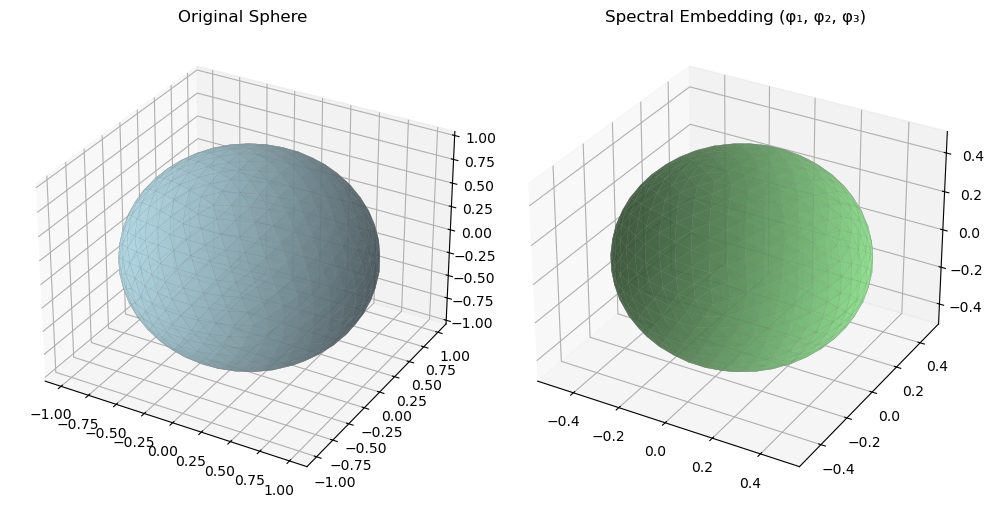

In [48]:
fig = plt.figure(figsize=(10, 5))

# Original mesh
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(V[:, 0], V[:, 1], V[:, 2], triangles=F,
                 alpha=0.7, color='lightblue', edgecolor='gray', linewidth=0.1)
ax1.set_title('Original Sphere')

# Spectral embedding
ax2 = fig.add_subplot(122, projection='3d')
V_spec = eigenvectors[:, :3]  # first 3 eigenvectors as coordinates
ax2.plot_trisurf(V_spec[:, 0], V_spec[:, 1], V_spec[:, 2], triangles=F,
                 alpha=0.7, color='lightgreen', edgecolor='gray', linewidth=0.1)
ax2.set_title('Spectral Embedding (φ₁, φ₂, φ₃)')

plt.tight_layout()
plt.show()

## Torus

The torus embedding is more interesting — the spectral coordinates naturally reveal its toroidal structure.

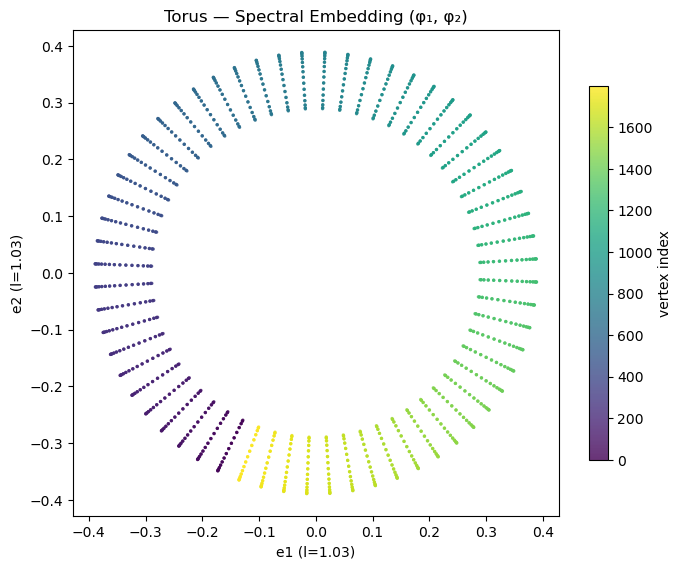

In [27]:
V_t, F_t = load_mesh(f'{ROOT}/meshes/torus.obj')
L_t = cotangent_weights(V_t, F_t)
M_t = mass_matrix(V_t, F_t)
ev_t, evec_t = spectral_decomposition(L_t, M_t, k=10)

plot_spectral_embedding(
    evec_t, ev_t,
    dims=(0, 1),
    title='Torus — Spectral Embedding (φ₁, φ₂)',
)

## Next

In the next notebook, we introduce spectral filtering and make some demos.

## References

1) https://elemento.medium.com/demystifying-spectral-embedding-b2368bba580
2) https://people.inf.ethz.ch/arbenz/ewp/Lnotes/2010/chapter12.pdf